In [ ]:
# Author : Tapas

## Applications of Machine Learning in Stock Markets

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.Data Preparation

In [2]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pandas.plotting import lag_plot

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
today = dt.date.today()
year_back = 20
end_date = today - dt.timedelta(days = 365 * year_back)

In [5]:
print(today)
print(end_date)

2023-04-01
2003-04-06


In [ ]:
# reliance_data = pdr.get_data_yahoo(f"{'RELIANCE.NS'}",today,end_date)
# reliance_data.sample(5)

In [ ]:
# # download dataframe
# data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")
# data

In [ ]:
# df= yf.Ticker("^NSEBANK").history(period='12y').reset_index()
# df_axis= yf.Ticker("AXISBANK.NS").history(period='3y').reset_index()
# df_sbi= yf.Ticker("SBIN.NS").history(period='3y').reset_index()
# df_rbl= yf.Ticker("RBLBANK.NS").history(period='3y').reset_index()
# df_pnb= yf.Ticker("PNB.NS").history(period='3y').reset_index()
# df_kot= yf.Ticker("KOTAKBANK.NS").history(period='3y').reset_index()
# df_ind= yf.Ticker("INDUSINDBK.NS").history(period='3y').reset_index()
# df_idfc= yf.Ticker("IDFCFIRSTB.NS").history(period='3y').reset_index()
# df_icic= yf.Ticker("ICICIBANK.NS").history(period='3y').reset_index()
# df_band= yf.Ticker("BANDHANBNK.NS").history(period='3y').reset_index()
# df_hdfc= yf.Ticker("HDFC.NS").history(period='3y').reset_index()
# df_fed= yf.Ticker("FEDERALBNK.NS").history(period='3y').reset_index()
# df_au= yf.Ticker("AUBANK.NS").history(period='3y').reset_index()

In [ ]:
# df= yf.download(tickers = "^NSEBANK",  # list of tickers
#             period = "20y",         # time period
#             interval = "1d",       # trading interval
#             ignore_tz = True,      # ignore timezone when aligning data from different exchanges?
#             prepost = False       # download pre/post market hours data?
#             ).reset_index()

In [ ]:
# df= yf.download(tickers = "^NSEBANK",
#             start = '2008-01-01', end = today,
#             interval = "1d",
#             ignore_tz = True,
#             prepost = False
#             ).reset_index()

# df= yf.download(tickers = "^NSEBANK",
#             period = "max",
#             interval = "1d",
#             ignore_tz = True,
#             prepost = False
#             ).reset_index()

In [6]:
df= yf.download(tickers = "^NSEBANK",
            start = '2008-01-01',
            interval = "1d",
            ignore_tz = True,
            prepost = False
            ).reset_index()

[*********************100%***********************]  1 of 1 completed


In [7]:
df.tail(15)

,Date,Open,High,Low,Close,Adj Close,Volume
3451,2023-03-10,40805.250000,40839.000000,40341.699219,40485.449219,40485.449219,145300
3452,2023-03-13,40356.101562,40690.050781,39454.601562,39564.699219,39564.699219,174500
3453,2023-03-14,39522.398438,39768.500000,39132.601562,39411.398438,39411.398438,205700
3454,2023-03-15,39777.898438,39914.101562,38934.648438,39051.500000,39051.500000,164300
3455,2023-03-16,39061.699219,39381.398438,38613.148438,39132.601562,39132.601562,196300
3456,2023-03-17,39442.398438,39705.148438,38926.800781,39598.101562,39598.101562,173400
3457,2023-03-20,39512.101562,39512.101562,38941.898438,39361.949219,39361.949219,173800
3458,2023-03-21,39599.648438,39970.898438,39366.300781,39894.699219,39894.699219,187900
3459,2023-03-22,40036.000000,40085.601562,39837.800781,39999.050781,39999.050781,0
3460,2023-03-23,39836.148438,40201.601562,39552.500000,39616.898438,39616.898438,153200


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d").dt.floor('D')
display(df['Date'].min())
display(df['Date'].max())

Timestamp('2008-01-01 00:00:00')

Timestamp('2023-03-31 00:00:00')

In [9]:
max_date = str(df['Date'].max())
dateprocess_max = dt.datetime.strptime(max_date, "%Y-%m-%d %H:%M:%S")
min_date = str(df['Date'].min())
dateprocess_min = dt.datetime.strptime(min_date, "%Y-%m-%d %H:%M:%S")
#max_date_limit = (dateprocess_max - pd.DateOffset(days=1)).strftime('%Y-%m-%d')
min_date_limit = str(dateprocess_min.year) +'-'+ str(dateprocess_min.month) +'-'+ str(dateprocess_min.day)
max_date_limit = str(dateprocess_max.year) +'-'+ str(dateprocess_max.month) +'-'+ str(dateprocess_max.day)

In [10]:
dates_required = pd.date_range(min_date, max_date, freq='D').strftime("%Y-%m-%d").tolist()
dates_required = pd.DataFrame(dates_required, columns = ['Date'])
dates_required.Date = pd.to_datetime(dates_required.Date)
processed_data = dates_required.merge(df,on='Date', how='left')
processed_data.columns = df.columns
processed_data = processed_data.fillna(method='ffill')
processed_data['Date'] = pd.to_datetime(processed_data['Date'], format="%Y-%m-%d").dt.floor('D')

In [11]:
processed_data['OCDifference'] = processed_data['Open']-processed_data['Close']
processed_data['OCDiff_perc'] = (processed_data['Open']-processed_data['Close'])/processed_data['Open']*100

processed_data['OHDifference'] = processed_data['Open']-processed_data['High']
processed_data['OHDiff_perc'] = (processed_data['Open']-processed_data['High'])/processed_data['Open']*100

processed_data['OLDifference'] = processed_data['Open']-processed_data['Low']
processed_data['OLDiff_perc'] = (processed_data['Open']-processed_data['Low'])/processed_data['Open']*100

processed_data['OADifference'] = processed_data['Open']-processed_data['Adj Close']
processed_data['OADiff_perc'] = (processed_data['Open']-processed_data['Adj Close'])/processed_data['Open']*100

In [12]:
processed_data.tail(15)

,Date,Open,High,Low,Close,Adj Close,Volume,OCDifference,OCDiff_perc,OHDifference,OHDiff_perc,OLDifference,OLDiff_perc,OADifference,OADiff_perc
5554,2023-03-17,39442.398438,39705.148438,38926.800781,39598.101562,39598.101562,173400.0,-155.703125,-0.394761,-262.750000,-0.666161,515.597656,1.307217,-155.703125,-0.394761
5555,2023-03-18,39442.398438,39705.148438,38926.800781,39598.101562,39598.101562,173400.0,-155.703125,-0.394761,-262.750000,-0.666161,515.597656,1.307217,-155.703125,-0.394761
5556,2023-03-19,39442.398438,39705.148438,38926.800781,39598.101562,39598.101562,173400.0,-155.703125,-0.394761,-262.750000,-0.666161,515.597656,1.307217,-155.703125,-0.394761
5557,2023-03-20,39512.101562,39512.101562,38941.898438,39361.949219,39361.949219,173800.0,150.152344,0.380016,0.000000,0.000000,570.203125,1.443110,150.152344,0.380016
5558,2023-03-21,39599.648438,39970.898438,39366.300781,39894.699219,39894.699219,187900.0,-295.050781,-0.745084,-371.250000,-0.937508,233.347656,0.589267,-295.050781,-0.745084
5559,2023-03-22,40036.000000,40085.601562,39837.800781,39999.050781,39999.050781,0.0,36.949219,0.092290,-49.601562,-0.123892,198.199219,0.495052,36.949219,0.092290
5560,2023-03-23,39836.148438,40201.601562,39552.500000,39616.898438,39616.898438,153200.0,219.250000,0.550380,-365.453125,-0.917391,283.648438,0.712038,219.250000,0.550380
5561,2023-03-24,39555.250000,39767.898438,39294.898438,39395.351562,39395.351562,166100.0,159.898438,0.404241,-212.648438,-0.537599,260.351562,0.658197,159.898438,0.404241
5562,2023-03-25,39555.250000,39767.898438,39294.898438,39395.351562,39395.351562,166100.0,159.898438,0.404241,-212.648438,-0.537599,260.351562,0.658197,159.898438,0.404241
5563,2023-03-26,39555.250000,39767.898438,39294.898438,39395.351562,39395.351562,166100.0,159.898438,0.404241,-212.648438,-0.537599,260.351562,0.658197,159.898438,0.404241


# 2. Fit Model

## 2.1 LSTM

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import tensorflow as tf
tf.random.set_seed(7)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [15]:
Scale=StandardScaler()
def data_prep(df, cols_str, lookback, future, Scale):
    date_train=pd.to_datetime(df['Date'], format="%Y-%m-%d").dt.floor('D')
    cols = cols_str.split(",")
    df_for_training = df[cols].astype(float)
    
    #df_for_training_scaled=Scale.fit_transform(df_train)
    scaler = Scale.fit(df_for_training)
    df_for_training_scaled = scaler.transform(df_for_training)

    trainX = []
    trainY = []
    for i in range(lookback, len(df_for_training_scaled) - future +1):
        trainX.append(df_for_training_scaled[i - lookback:i, 0:df_for_training.shape[1]])
        trainY.append(df_for_training_scaled[i + future - 1:i + future, 0])

    trainX, trainY = np.array(trainX), np.array(trainY)
        
    return trainX, trainY, df_for_training, date_train

In [ ]:
cols_str = 'Open,High,Low,Close,Adj Close,Volume,OCDifference,OCDiff_perc,OHDifference,OHDiff_perc,OLDifference,OLDiff_perc,OADifference,OADiff_perc'
lookback = 30
future = 1

In [ ]:
#Lstm_x, Lstm_y, df_train, date_train = data_prep(processed_data, cols_str, 12, 1, Scale)

In [16]:
def Lstm_model(trainX,trainY):
    tf.keras.backend.clear_session()
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    #model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model.add(LSTM(50, activation='relu', return_sequences=True))
    #model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model.add(LSTM(50, activation='relu', return_sequences=True))
    #model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model.add(LSTM(units = 50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(trainY.shape[1]))

    ## compile the model and specify loss and optimizer
    #opt = keras.optimizers.Adam(learning_rate=0.01)
    #opt = Adam(learning_rate=0.01, beta_1=0.85, beta_2=0.999)
    #model.compile(optimizer=opt, loss='mse')

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.summary()
    
    # fit the model
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    model.fit(trainX, trainY, epochs=100, batch_size=64, validation_split=0.1, verbose=1, callbacks=[es])
    #model.fit(trainX, trainY, epochs=100, batch_size=24, validation_split=0.1, verbose=1)
    
    return model

In [ ]:
# def Lstm_model1(X, y):
#     regressor = Sequential()
#     regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X.shape[1], X.shape[2])))
#     regressor.add(Dropout(0.2))
#     regressor.add(LSTM(units = 50, return_sequences = True))
#     regressor.add(Dropout(0.2))
#     regressor.add(LSTM(units = 50, return_sequences = True))
#     regressor.add(Dropout(0.2))
#     regressor.add(LSTM(units = 50))
#     regressor.add(Dropout(0.2))
#     regressor.add(Dense(units = 1))

#     regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
#     es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
#     regressor.fit(X, y, epochs = 100, validation_split=0.1, batch_size = 64, verbose=1, callbacks=[es])
#     return regressor

In [17]:
def predict_open(model, date_train, trainX, df_train, future, Scale):
    forecasting_dates=pd.date_range(list(date_train)[-1], periods=future +1, freq='D').tolist()
    #from pandas.tseries.offsets import DateOffset
    #forecasting_dates = [df.Date[-1:] + DateOffset(months=x) for x in range(0, future + 1)]
    forecasting_dates.pop(0)
    
    predicted = model.predict(trainX[-future:])
    prediction_copies = np.repeat(predicted, df_train.shape[1], axis=-1)
    predicted_descaled = Scale.inverse_transform(prediction_copies)[:,0]
    
    return predicted_descaled,forecasting_dates

def output_prep(forecasting_dates, predicted_descaled, pred_col_name):
    # Convert timestamp to date
    forecast_dates = []
    for time_i in forecasting_dates:
        forecast_dates.append(time_i.date())
    
    y_fcst_lower = predicted_descaled * 0.999
    y_fcst_upper = predicted_descaled * 1.002
    low_col = pred_col_name + '_lower'
    up_col = pred_col_name + '_upper'
    #pred_col_name = 'Frcst_'+ pred_col_name
    df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), low_col:y_fcst_lower,
                                pred_col_name:predicted_descaled, up_col:y_fcst_upper})
    df_forecast['Date']=pd.to_datetime(df_forecast['Date']).dt.floor('D')
    df_forecast = df_forecast.round(2)
    
    return df_forecast


In [18]:
def results(df, lookback, future, Scale, cols, pred_col_name, plot_title, n_pred_future):
    Lstm_x, Lstm_y, df_train, date_train = data_prep(df, cols, lookback, future, Scale)
    model=Lstm_model(Lstm_x,Lstm_y)
    loss=pd.DataFrame(model.history.history)
    loss.plot()
    predicted_descaled,forecasting_dates = predict_open(model, date_train, Lstm_x, df_train, n_pred_future, Scale)
    results = output_prep(forecasting_dates, predicted_descaled, pred_col_name)   
    print(results.head())
    plt.show()
    fig = px.area(results, x="Date", y=pred_col_name, title=plot_title)
    fig.update_yaxes(range=[results[pred_col_name].min()-10, results[pred_col_name].max()+10])
    fig.show()
    
    return results

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            18688     
                                                                 
 lstm_1 (LSTM)               (None, 30, 50)            23000     
                                                                 
 lstm_2 (LSTM)               (None, 30, 50)            20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 82,139
Trainable params: 82,139
Non-traina

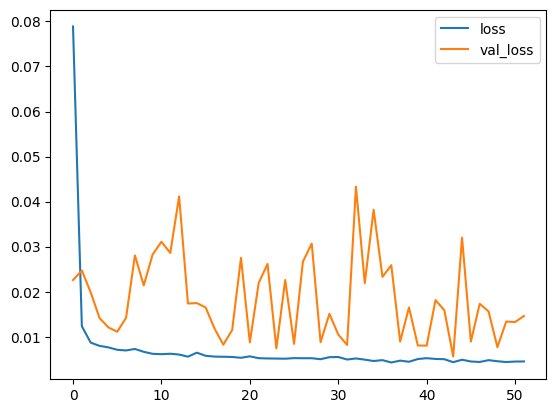

In [46]:
#cols_str = 'Open,High,Low,Close,Adj Close,Volume,OCDifference,OCDiff_perc,OHDifference,OHDiff_perc,OLDifference,OLDiff_perc,OADifference,OADiff_perc'
cols_str = 'Open,High,Low,Close,Adj Close,Volume,OCDifference,OCDiff_perc'
lookback = 30
future = 1
pred_col_name = 'F_Open'
plot_title = 'Open value of BankNifty'
n_pred_future = 30

df_forecast = results(processed_data, lookback, future, Scale, cols_str, pred_col_name, plot_title, n_pred_future)
# df_forecast = pd.DataFrame()
# for prod in df.Item_Code.unique():
#     print(prod)
#     df1 = df[df['Item_Code']==prod]
#     res = results(df1, lookback, future, Scale, cols_str, pred_col_name, plot_title, n_pred_future)
#     df_forecast = pd.concat([df_forecast,res])

In [47]:
df_forecast.head()

,Date,F_Open_lower,F_Open,F_Open_upper
0,2023-04-01,38572.660156,38611.261719,38688.488281
1,2023-04-02,38607.250000,38645.898438,38723.179688
2,2023-04-03,38955.070312,38994.058594,39072.050781
3,2023-04-04,39055.890625,39094.980469,39173.171875
4,2023-04-05,39181.078125,39220.300781,39298.738281


In [ ]:
# # save the scaler
# import pickle
# pickle.dump(Scale, open('/content/drive/MyDrive/Colab Notebooks/Scale.pkl', 'wb'))
# # load the scaler
# Scale = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Scale.pkl', 'rb'))

In [ ]:
# # Calling `save('my_model.h5')` creates a h5 file `my_model.h5`.
# model.save("/content/drive/MyDrive/Colab Notebooks/my_h5_model.h5")
# # It can be used to reconstruct the model identically.
# saved_model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/my_h5_model.h5")

In [34]:
import os
os.getcwd()

'/content'

## 2.2 FBPROPHET

In [43]:
# !pip install --user kats
# !pip install pystan==2.19.1.1
# !pip install fbprophet==0.7.1

In [22]:
# n_pred_future = 30
# from kats.consts import TimeSeriesData as tsd
# data = tsd(processed_data[['Date','Open']])
# from kats.models.prophet import ProphetModel
# from kats.models.prophet import ProphetParams

# parms = ProphetParams(seasonality_mode='multiplicative', interval_width=0.95)
# model = ProphetModel(data,parms)
# model.fit()
# forcast = model.predict(steps = n_pred_future, freq="D")

In [36]:
from prophet import Prophet

data = processed_data[['Date','Open']]
data.columns = ['ds','y']
n_pred_future = 30
#m = Prophet(seasonality_mode='multiplicative', interval_width=0.999)
m = Prophet(seasonality_mode='multiplicative')
m.fit(data)
future = m.make_future_dataframe(n_pred_future, freq='D', include_history=False)
p_forecast = m.predict(future)
p_forecast = p_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
p_forecast['yhat_lower'] = p_forecast['yhat'] * 0.999
p_forecast['yhat_upper'] = p_forecast['yhat'] * 1.002
p_forecast.rename(columns = {'ds':'Date','yhat':'F_Open','yhat_lower':'F_Open_lower','yhat_upper':'F_Open_upper'}, inplace = True)
p_forecast = p_forecast.round(2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpot7ymnwd/mf89r07x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpot7ymnwd/7apk55ro.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3295', 'data', 'file=/tmp/tmpot7ymnwd/mf89r07x.json', 'init=/tmp/tmpot7ymnwd/7apk55ro.json', 'output', 'file=/tmp/tmpot7ymnwd/prophet_modelnsqufgnf/prophet_model-20230401174511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:45:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:45:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [37]:
p_forecast.head()

,Date,F_Open,F_Open_lower,F_Open_upper
0,2023-04-01,41789.37,41747.59,41872.95
1,2023-04-02,41821.31,41779.48,41904.95
2,2023-04-03,41865.01,41823.14,41948.74
3,2023-04-04,41928.32,41886.39,42012.18
4,2023-04-05,42035.15,41993.12,42119.22


# 3. Dump forcast results

In [31]:
today = dt.date.today()
currentMonth = today.strftime("%b")

In [33]:
import os
path = f'/content/drive/MyDrive/Colab Notebooks/{currentMonth}'
isExist = os.path.exists(path)
if not isExist:
  # Create a new directory because it does not exist
  os.makedirs(path)

In [48]:
# for LSTM
lstm_path = f'/content/drive/MyDrive/Colab Notebooks/{currentMonth}/BankNifty_{currentMonth}_lstm.xlsx'
df_forecast.to_excel(lstm_path, index=False)

In [38]:
# for Prophet
prophet_path = f'/content/drive/MyDrive/Colab Notebooks/{currentMonth}/BankNifty_{currentMonth}_prophet.xlsx'
p_forecast.to_excel(prophet_path, index=False)

# 4. Checking anamoly

## 4.1 LSTM

In [2]:
import os
import datetime as dt
import pandas as pd
import numpy as np
import yfinance as yf

In [6]:
today = dt.date.today()
currentMonth = today.strftime("%b")

In [8]:
lstm_path = f'/content/drive/MyDrive/Colab Notebooks/{currentMonth}/BankNifty_{currentMonth}_lstm.xlsx'
df = pd.read_excel(lstm_path)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d').dt.floor('D')
df = df[df['Date']==today.strftime('%Y-%m-%d')]

In [9]:
df

,Date,F_Open_lower,F_Open,F_Open_upper
1,2023-03-31,38569.511719,38608.121094,38685.328125


In [89]:
# read the result file
result_path = f'/content/drive/MyDrive/Colab Notebooks/{currentMonth}/BankNifty_{currentMonth}_result.xlsx'
isExist = os.path.exists(result_path)
if not isExist:
  result = pd.DataFrame()
else :
  result = pd.read_excel(result_path)

In [11]:
df1= yf.download(tickers = "^NSEBANK",
            start = today,
            interval = "1d",
            ignore_tz = True,
            prepost = False
            ).reset_index()
df1 = df1[['Date','Open']]
df1

[*********************100%***********************]  1 of 1 completed


,Date,Open
0,2023-03-31,40231.25


In [98]:
today_result = pd.DataFrame()
today_result['Date'] = df1['Date']
today_result['Open'] = df1['Open']
today_result['F_Open'] = df['F_Open'].values
today_result['F_Open_lower'] = df['F_Open_lower'].values
today_result['F_Open_upper'] = df['F_Open_upper'].values
today_result['Date'] = pd.to_datetime(today_result['Date'], format='%Y-%m-%d').dt.floor('D')
today_result['Comment'] = np.where(
    today_result['Open'] < today_result['F_Open_lower'], 'below lower level',
    np.where(
        (today_result['F_Open_lower'] <= today_result['Open']) & (today_result['Open'] < today_result['F_Open']), 
        'between low and open level',
        np.where(
            (today_result['F_Open'] <= today_result['Open']) & (today_result['Open'] < today_result['F_Open_upper']), 
            'between open and high level', 
            'above high'
        )
    )
)
today_result['F_Method'] = 'lstm'

In [99]:
today_result

,Date,Open,F_Open,F_Open_lower,F_Open_upper,Comment,F_Method
0,2023-03-31,40231.25,38608.121094,38569.511719,38685.328125,above high,lstm


In [100]:
today_result = pd.concat([result,today_result])
today_result.to_excel(result_path, index=False)

## 4.2 Prophet

In [101]:
prophet_path = f'/content/drive/MyDrive/Colab Notebooks/{currentMonth}/BankNifty_{currentMonth}_prophet.xlsx'
df = pd.read_excel(prophet_path)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d').dt.floor('D')
df = df[df['Date']==today.strftime('%Y-%m-%d')]

# read the result file
result_path = f'/content/drive/MyDrive/Colab Notebooks/{currentMonth}/BankNifty_{currentMonth}_result.xlsx'
isExist = os.path.exists(result_path)
if not isExist:
  result = pd.DataFrame()
else :
  result = pd.read_excel(result_path)

df1= yf.download(tickers = "^NSEBANK",
            start = today,
            interval = "1d",
            ignore_tz = True,
            prepost = False
            ).reset_index()
df1 = df1[['Date','Open']]

today_result = pd.DataFrame()
today_result['Date'] = df1['Date']
today_result['Open'] = df1['Open']
today_result['F_Open'] = df['F_Open'].values
today_result['F_Open_lower'] = df['F_Open_lower'].values
today_result['F_Open_upper'] = df['F_Open_upper'].values
today_result['Date'] = pd.to_datetime(today_result['Date'], format='%Y-%m-%d').dt.floor('D')
today_result['Comment'] = np.where(
    today_result['Open'] < today_result['F_Open_lower'], 'below lower level',
    np.where(
        (today_result['F_Open_lower'] <= today_result['Open']) & (today_result['Open'] < today_result['F_Open']), 
        'between low and open level',
        np.where(
            (today_result['F_Open'] <= today_result['Open']) & (today_result['Open'] < today_result['F_Open_upper']), 
            'between open and high level', 
            'above high'
        )
    )
)
today_result['F_Method'] = 'prophet'


[*********************100%***********************]  1 of 1 completed


In [ ]:
today_result = pd.concat([result,today_result])
today_result.to_excel(result_path, index=False)

# 5. LSTM Hyper Tunning

In [49]:
Lstm_x, Lstm_y, df_train, date_train = data_prep(processed_data, cols_str, lookback, future, Scale)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Lstm_x, Lstm_y, test_size=0.1, random_state=0)

In [55]:
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
def build_model(hp):
    tf.keras.backend.clear_session()
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=512,step=32),return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    for i in range(hp.Int('n_layers', 1, 3)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=512,step=32),return_sequences=True))
    model.add(LSTM(hp.Int('layer_2_neurons',min_value=32,max_value=512,step=32)))
    #model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(y_train.shape[1], activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    #model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  #loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    #model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['mse'])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='mean_squared_error', metrics=['mse'])
    
    return model

In [56]:
LOG_DIR = f"/content"
tuner= RandomSearch(
        build_model,
        objective='mse',
        max_trials=5,
        executions_per_trial=1,
        directory=LOG_DIR
        )

In [57]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
input_unit (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
n_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
lstm_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
layer_2_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
 stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
 tuner.search(
        x=X_train,
        y=y_train,
        epochs=100,
        batch_size=128,
        validation_data=(X_test,y_test), callbacks=[stop_early]
)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
224               |224               |input_unit
2                 |2                 |n_layers
384               |384               |lstm_0_units
416               |416               |layer_2_neurons
sigmoid           |sigmoid           |dense_activation
0.0001            |0.0001            |learning_rate

Epoch 1/100
39/39 [==============================] - 73s 2s/step - loss: 0.7717 - mse: 0.7717 - val_loss: 0.5209 - val_mse: 0.5209
Epoch 2/100
39/39 [==============================] - 61s 2s/step - loss: 0.5288 - mse: 0.5288 - val_loss: 0.5032 - val_mse: 0.5032
Epoch 3/100
39/39 [==============================] - 59s 2s/step - loss: 0.5105 - mse: 0.5105 - val_loss: 0.4860 - val_mse: 0.4860
Epoch 4/100
39/39 [==============================] - 56s 1s/step - loss: 0.5035 - mse: 0.5035 - val_loss: 0.4846 - val_mse: 0.4846
Epoch 5/100
39/39 [==============================] - 58s 1s/step - loss: 0.5022 - mse: 